<a href="https://colab.research.google.com/github/Dongkyu1102/Data_analysis_final_project/blob/main/%EC%9D%B8%EC%8A%A4%ED%83%80_%EB%8C%93%EA%B8%80_%EC%A3%BC%EC%A0%9C%EB%B6%84%EC%84%9D(%EC%A0%84%EC%B2%98%EB%A6%AC%2C%20LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음식+먹방_댓글_주제분석

In [ ]:
pip install pyLDAvis   # 설치후 런타임 재실행 필요

In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATA_PATH = "/content/drive/MyDrive/"

In [ ]:
df = pd.read_csv(f"{DATA_PATH}결측치_이모티콘_불필요정보_제거_통합데이터.csv")
df

In [ ]:
df['분야']
df['분야'].unique()


In [ ]:
df_1 = df[df['분야'] == '요리/ 홈쿡/ 집밥']
df_1.head()

In [ ]:
df_2 = df[df['분야'] == '맛집/ 먹방']
df_2.head()

In [ ]:
df_3 = df[df['분야'] == '요리/ 먹방/ 맛집/ ']
df_3.head()

In [ ]:
df_all = pd.concat([df_1, df_2, df_3])
df_all.head()

In [ ]:
df_all['분야'].unique()

In [ ]:
df_all['분야'] = '요리+맛집'

df_all['분야'].unique()

In [ ]:
df_all

In [ ]:
df_all = df_all.reset_index(drop=False)

In [ ]:
df_all.head()

In [ ]:
df_all.loc[:]

In [ ]:
df_all['comments']

In [ ]:
df_all['comments'][:]

In [ ]:
a = df_all['comments'][0]
a[:5]

In [ ]:
import ast

b = ast.literal_eval(df_all['comments'][0])
b[:2]

In [ ]:
len(b[0])

In [ ]:
df_all_total_A = []  # 빈 리스트 생성

# df_all['comments']에 있는 각 문자열을 파이썬 리스트로 변환하여 df_all_total에 추가
for x in df_all['comments']:
    ast.literal_eval(x)
    df_all_total_A.append(ast.literal_eval(x))

df_all_total_A

In [ ]:
df_all_total_A[0]

In [ ]:
df_all_total_A[0][0]

In [ ]:
df_all_total_A[-1][-1]

In [ ]:
len(df_all_total_A)
# 게시글 수와 같음

In [ ]:
df_all_total_B = []  # 빈 리스트 생성

for x in df_all['comments']:
    ast.literal_eval(x)
    df_all_total_B.extend(ast.literal_eval(x))

df_all_total_B

In [ ]:
df_all_total_B[0]

In [ ]:
df_all_total_B[-1]

In [ ]:
len(df_all_total_B)
# 모든 게시글들의 댓글 갯수의 총 합

In [ ]:
df_all_total_B[220816]

In [ ]:
df_all_total_A

In [ ]:
df_all_total_B

In [ ]:
pip install --upgrade pip

#kiwi를 이용한 형태소 분리

In [ ]:
pip install kiwipiepy

In [ ]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

kiwi = Kiwi()
stopwords = Stopwords()

In [ ]:
text = kiwi.tokenize(df_all_total_B[0])
text[0], text[0].tag[0] in "NNP"

In [ ]:
text

In [ ]:
train_list = []

comments_text = kiwi.tokenize(df_all_total_B, stopwords=stopwords)

for tokens in tqdm(comments_text, total=len(df_all_total_B)):
    tokens = [t.form for t in tokens if t.tag in ("NNG", "NNP", "NNB", "NR", "NP", "VV", "VA", "XR")]    # NNG:일반 명사 / NNP: 고유 명사 / NNB: 의존 명사 / NR: 수사 / NP: 대명사 / VV: 동사 / VA: 형용사 / XR: 어근
    train_list.append(tokens)

train_list

In [ ]:
# 일반명사만

train_list_NNG = []

comments_text = kiwi.tokenize(df_all_total_B, stopwords=stopwords)

for tokens in tqdm(comments_text, total=len(df_all_total_B)):
    tokens = [t.form for t in tokens if t.tag in ("NNG")]    # NNG:일반 명사 / NNP: 고유 명사 / NNB: 의존 명사 / NR: 수사 / NP: 대명사 / VV: 동사 / VA: 형용사 / XR: 어근
    train_list_NNG.append(tokens)

train_list_NNG

In [ ]:
# 명사만

train_list_noun = []

comments_text = kiwi.tokenize(df_all_total_B, stopwords=stopwords)

for tokens in tqdm(comments_text, total=len(df_all_total_B)):
    tokens = [t.form for t in tokens if t.tag in ("NNG", "NNP", "NNB", "NR", "NP")]    # NNG:일반 명사 / NNP: 고유 명사 / NNB: 의존 명사 / NR: 수사 / NP: 대명사 / VV: 동사 / VA: 형용사 / XR: 어근
    train_list_noun.append(tokens)

train_list_noun

In [ ]:
train_fine_lst= []
for i in range(len(train_list)):
    train_fine_lst += train_list[i]   #   += 연산자는 append() 메서드와 동일한 기능

train_fine_lst

In [ ]:
# 명사만

train_fine_noun_lst= []
for i in range(len(train_list_noun)):
    train_fine_noun_lst += train_list_noun[i]   #   += 연산자는 append() 메서드와 동일한 기능

train_fine_noun_lst

In [ ]:
# 일반명사만

train_fine_NNG_lst= []
for i in range(len(train_list_NNG)):
    train_fine_NNG_lst += train_list_NNG[i]   #   += 연산자는 append() 메서드와 동일한 기능

train_fine_NNG_lst

#단어 빈도수 확인

In [ ]:
from collections import Counter
vocab_counter = Counter(train_fine_lst)
vocab_counter.most_common(50)

In [ ]:
from collections import Counter
vocab_counter = Counter(train_fine_noun_lst)
vocab_counter.most_common(100)

In [ ]:
from collections import Counter
vocab_counter = Counter(train_fine_NNG_lst)
vocab_counter.most_common(100)

# kiwi에 미등록된 명사 추출

In [ ]:
none_words = kiwi.extract_words(df_all['comments'], min_cnt=50, max_word_len=10, min_score=0.10)
none_words

In [ ]:
min(len(lst) for lst in train_list_NNG)

In [ ]:
df_all[df_all['comments'] == '[]']

In [ ]:
mask = df_all['comments'] == '[]'
df_all = df_all[~mask]

#LDA

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging

In [ ]:
dic=corpora.Dictionary(train_list_NNG)
dic

In [ ]:
# 빈도수 2이상, 전체 50% 이상 차지하는 단어 필터링
dic.filter_extremes(no_below=2, no_above=0.5)

In [ ]:
# bag of words -> 사전 속의 단어가 문장에서 몇 번 출현하는지 빈도를 세서 벡터화
corpus = [dic.doc2bow(train_NNG) for train_NNG in train_list_NNG]
corpus

In [ ]:
corpus = [doc for doc in corpus if doc]
corpus


In [ ]:
from gensim.models.nmf import CoherenceModel

chunksize = 2000
passes = 20
iterations = 400
eval_every = None
id2word = dic.id2token

coherence_values = []

for i in tqdm(range(2,15)):
    model = LdaModel(
        corpus=corpus,
        id2word=dic,   #id2word -> dic을 변경하니 실행됨. 그러나 이 베이스라인 코드를 짠 수길님은 id2word로 잘 작동됨 why?
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=i, # 최적의 토픽수 찾아보기
        passes=passes,
        eval_every=eval_every
    )
    coherence_model_lda = CoherenceModel(model=model, texts = train_list_NNG, dictionary=dic, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
import pickle

In [ ]:
# 저장할 경로 설정
DATA_PATH = "/content/drive/MyDrive/"
coherence_values_file = os.path.join(DATA_PATH, 'coherence_values.pkl')

# 결과값 저장
with open(coherence_values_file, 'wb') as f:
    pickle.dump(coherence_values, f)

In [ ]:
# 불러올 경로 설정
DATA_PATH = "/content/drive/MyDrive/"
coherence_values_file = os.path.join(DATA_PATH, 'coherence_values.pkl')

# 결과값 불러오기
with open(coherence_values_file, 'rb') as f:
    coherence_values = pickle.load(f)
# 저장된 결과값 활용
# coherence_values를 이용하여 그래프 그리기 또는 분석 수행


In [ ]:
coherence_values

In [ ]:
import matplotlib.pyplot as plt

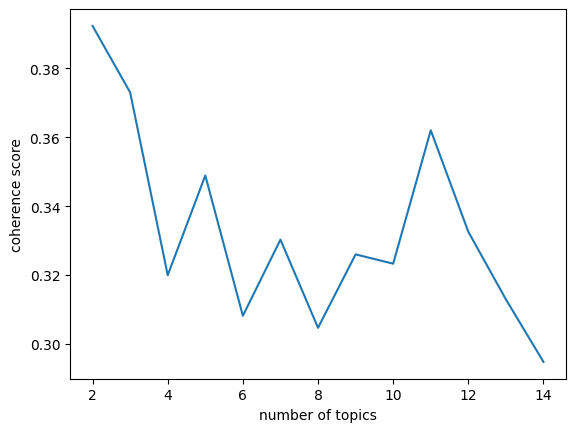

In [ ]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dic[0]
id2word = dic.id2token

model = LdaModel(
    corpus=corpus,
    id2word=dic,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) # num_words=20
top_topics

# LDA 시각화

In [138]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dic)
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dic[0]
id2word = dic.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dic)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
